# Import Libraries

In [291]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
#from sklearn.cluster import Kmeans, AgglomerativeClustering
import seaborn as sns
import warnings

In [292]:
warnings.simplefilter('ignore')

# Load dataset

In [293]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Descriptions

In [294]:
print("General information about data:\n",dataset.info)

General information about data:
 <bound method DataFrame.info of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>


In [295]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Number of Distinct Classes

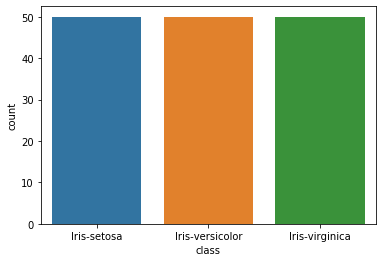

In [296]:
sns.countplot(x='class', data=dataset)

# Statistical Description of Features by Class

In [297]:
dataset.columns = [i.replace('-', '_') for i in dataset.columns]

In [298]:
dataset.groupby('class').sepal_length.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [299]:
dataset.groupby('class').sepal_width.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [300]:
dataset.groupby('class').petal_length.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [301]:
dataset.groupby('class').sepal_width.describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


# Box and Whisker plots

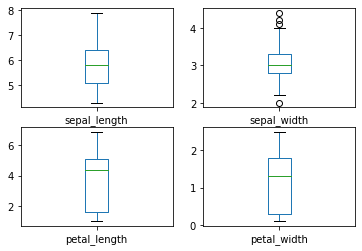

In [302]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Histograms

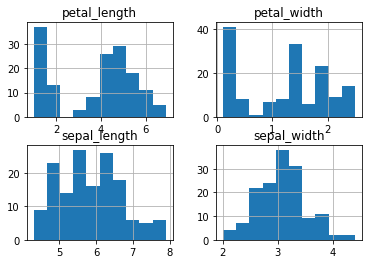

In [303]:
dataset.hist()
plt.show()

# Separation of Classes by Features

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal_length, dtype: object

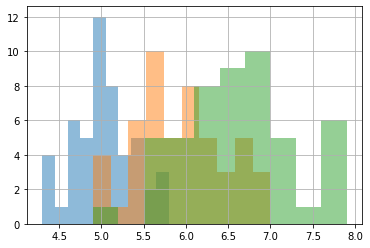

In [304]:
#print("General information about data:\n",dataset.info)
dataset.groupby('class').sepal_length.hist(alpha=0.5)

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal_width, dtype: object

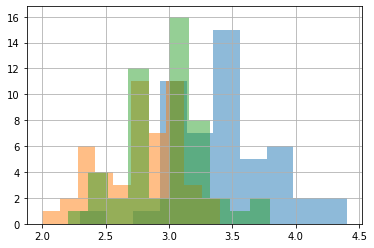

In [305]:
dataset.groupby('class').sepal_width.hist(alpha=0.5)

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal_length, dtype: object

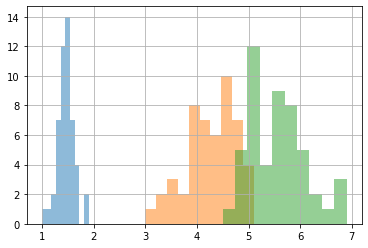

In [306]:
dataset.groupby('class').petal_length.hist(alpha=0.5)

class
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal_width, dtype: object

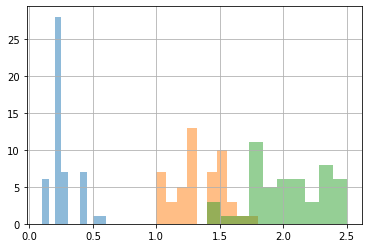

In [307]:
dataset.groupby('class').petal_width.hist(alpha=0.5)

# Typical Values of Features for each Class

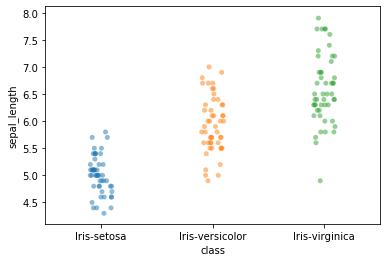

In [308]:
sns.stripplot(x='class', y='sepal_length', data=dataset, alpha=0.5, jitter=True)

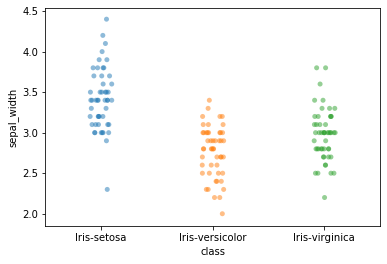

In [309]:
sns.stripplot(x='class', y='sepal_width', data=dataset, alpha=0.5, jitter=True)

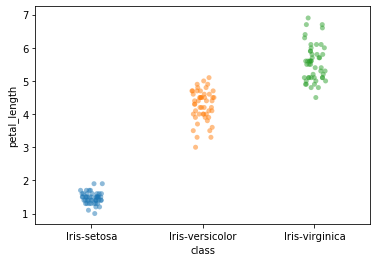

In [310]:
sns.stripplot(x='class', y='petal_length', data=dataset, alpha=0.5, jitter=True)

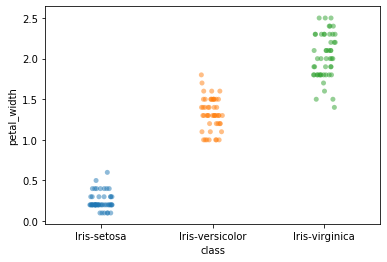

In [311]:
sns.stripplot(x='class', y='petal_width', data=dataset, alpha=0.5, jitter=True)

# Scatter plot matrix

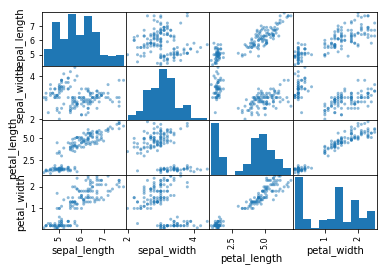

In [312]:
scatter_matrix(dataset)
plt.show()

# Separation of Classes by Clustering of Features

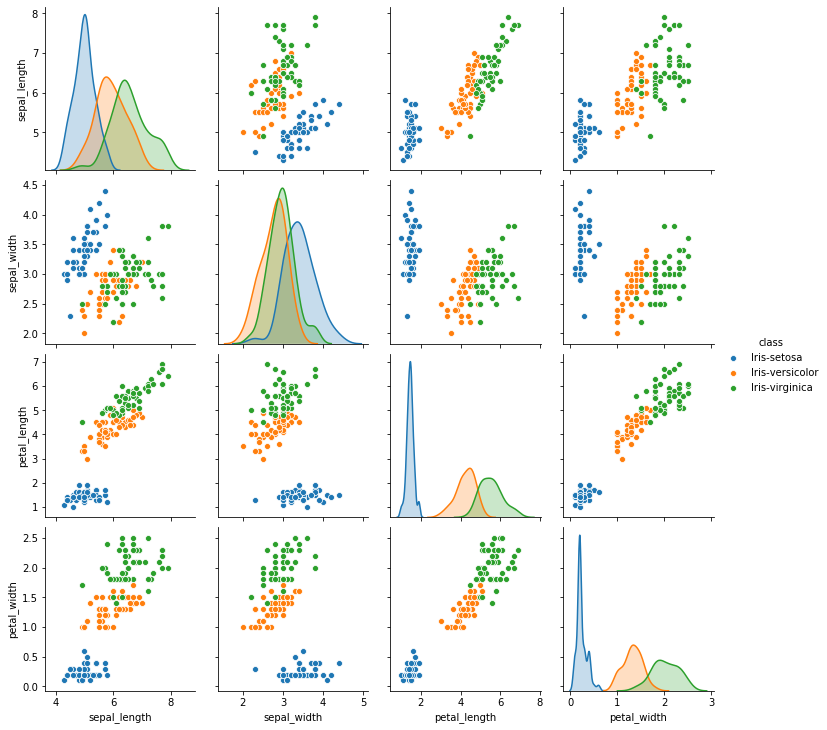

In [313]:
sns.pairplot(dataset, hue='class')

# Add Features Engineering

In [314]:
dataset_original = dataset.copy()

In [315]:
dataset.insert(4, 'sepal_width_to_length', dataset['sepal_width']/dataset['sepal_length'])                               
dataset.insert(5, 'petal_width_to_length', dataset['petal_width']/dataset['petal_length'])
dataset.insert(6, 'width_sepal_to_petal', dataset['sepal_width']/dataset['petal_width'])
dataset.insert(7, 'length_sepal_to_petal', dataset['sepal_length']/dataset['petal_length'])

Shape:  (150, 9) 

First records of data:
     sepal_length  sepal_width  petal_length  petal_width  \
0           5.1          3.5           1.4          0.2   
1           4.9          3.0           1.4          0.2   
2           4.7          3.2           1.3          0.2   
3           4.6          3.1           1.5          0.2   
4           5.0          3.6           1.4          0.2   

   sepal_width_to_length  petal_width_to_length  width_sepal_to_petal  \
0               0.686275               0.142857                  17.5   
1               0.612245               0.142857                  15.0   
2               0.680851               0.153846                  16.0   
3               0.673913               0.133333                  15.5   
4               0.720000               0.142857                  18.0   

   length_sepal_to_petal        class  
0               3.642857  Iris-setosa  
1               3.500000  Iris-setosa  
2               3.615385  Iris-setosa  
3 

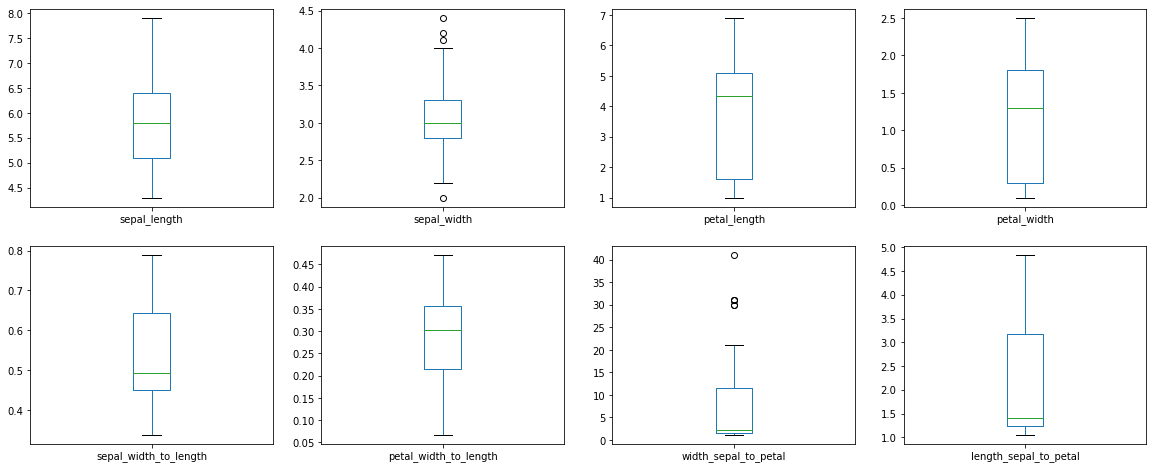



Histogram


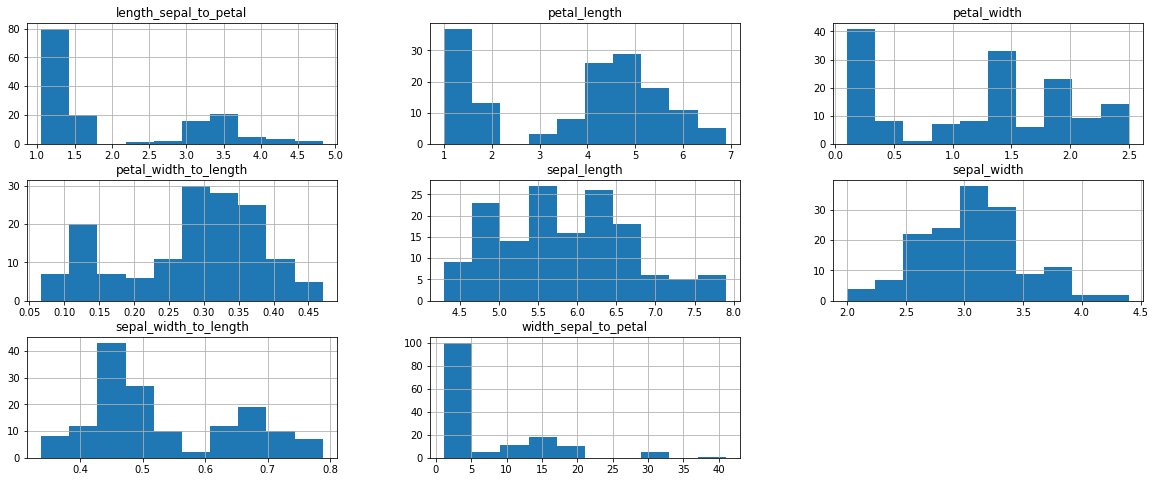



Scatter Matrix


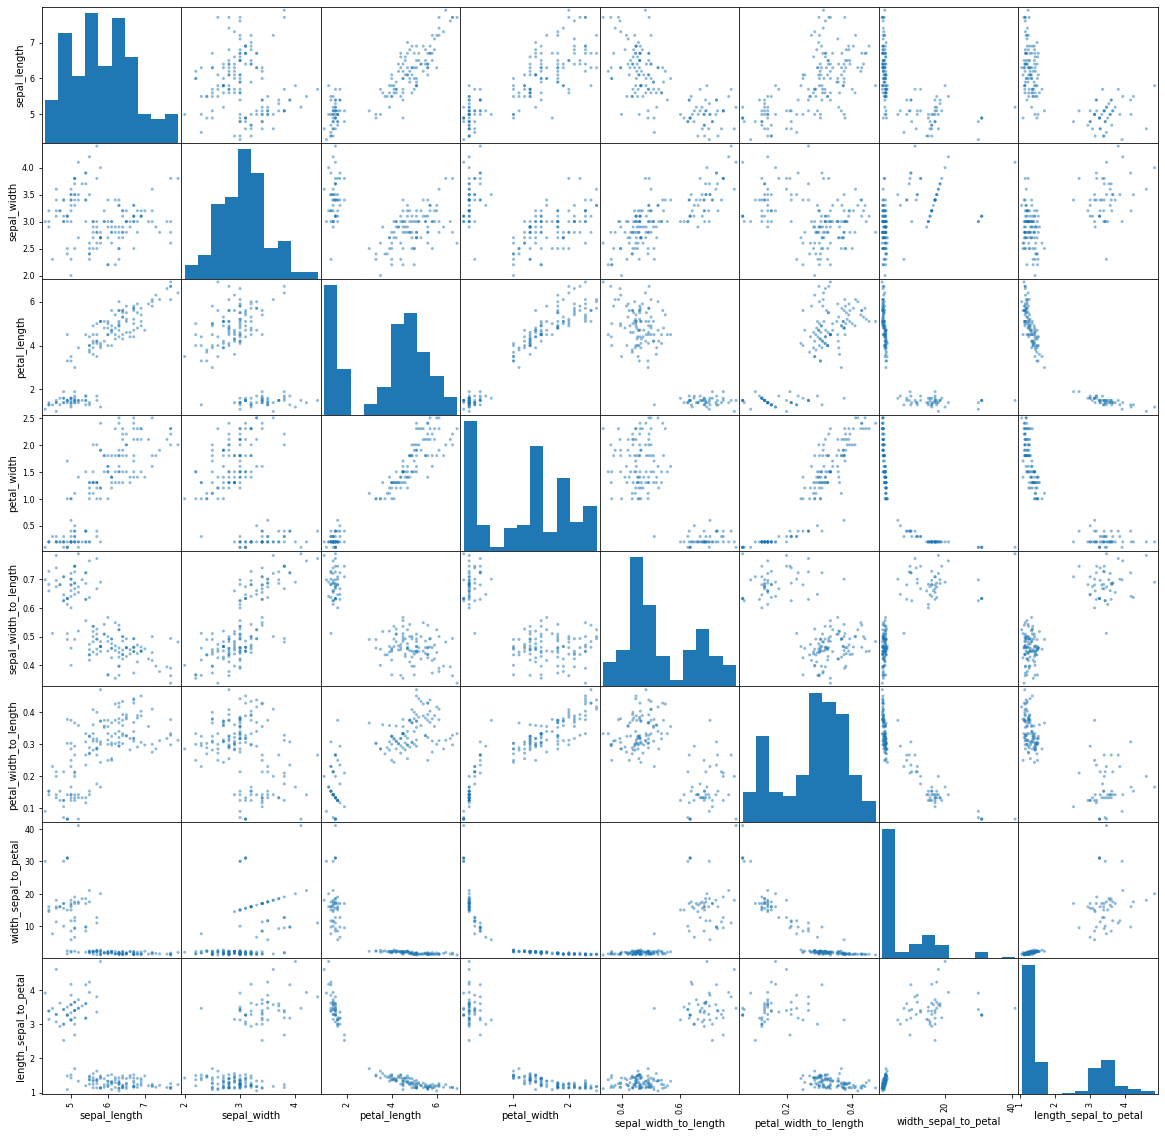

In [316]:
# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())
print('\n')
print('Box Plot')
dataset.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,8))
plt.show()
print('\n')
print('Histogram')
dataset.hist(figsize=(20,8))
plt.show()
print('\n')
print('Scatter Matrix')
scatter_matrix(dataset, figsize=(20,20))
plt.show()

# Split-out validation dataset

In [317]:
array = dataset.values
X = array[:,0:8]
Y = array[:,8]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

# Create Model Shells (Instantiate them)

In [318]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGBC', XGBClassifier()))

# Spot test each model with Cross-Validation

In [319]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.983333 (0.033333)
LDA: 0.983333 (0.033333)
KNN: 0.966667 (0.055277)
CART: 0.975000 (0.038188)
RF: 0.966667 (0.040825)
NB: 0.975000 (0.038188)
SVM: 0.983333 (0.033333)
GBC: 0.958333 (0.041667)
XGBC: 0.975000 (0.038188)


# Graphical comparison of algorithms

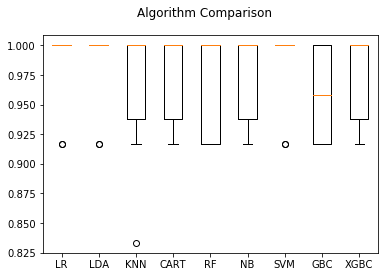

In [320]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset

Here, for each algorithm, we first make a prediction on validation dataset and, then, we tune hyperparameters of each model according to the following procidure:

We can implement a simple grid search just as for loops over the parameters of each model, training and evaluating a classifer for each combination. However, the score could be overly optimistic (or just wrong) since we try many different parameters and select the one with best accuracy on the test set, but this accuracy won't necessarily carry over to new data; we can use the test data to adjust the parameters as well as to assess how good the model is. One way to resolve this problem is to split the data again, so we have three sets: the training set build the model, the validation (or development) set to select the parameters of the model, and the test set the evaluate the performance of the selected parameters. This way we can avoid "leaking" of information from the test set into the model. While this method is workable, and relatively commonly used, it is quite sensitive to how exactly the data is split. For a better estimate of the generalization performance, instead of using a single split into training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination. As you can imagine, the main downside of the use of cross-validation is the time it takes to train all these models. To solve for this drawback, scikit-learn provides us the GridSearchCV class which implements the methodology in the form of an estimator. To use GridSearchCV class, I first specified the parameters I want to search over using a dictionary. GridSearchCV will then perform all the necessary model fits. It uses cross-validation in place of the split into a training and validation set. However,I still needed to split the data into a training and a test set, to avoid overfitting the parameters.We can call the standard methods fit, predict, and score on the grid_search classifer object we created. Fitting the GridSearchCV object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the parameters that yielded the best cross-validation performance.

# K-Nearest Neighbors:

In [321]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [322]:
kfold_cv = model_selection.KFold(n_splits=10, random_state=seed)
param_grid_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,30,40,50]}
grid_search_knn = model_selection.GridSearchCV(knn, param_grid_knn, cv=kfold_cv, return_train_score=True)
grid_search_knn.fit(X_train, Y_train)

# evaluate how well the best found parameters generalize
print("Test set score: {:.3f}".format(grid_search_knn.score(X_validation, Y_validation)))
print('\n')
# determine the model with the best parameters trained on the whole training set
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))
print('\n')
# the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
print("Best cross-validation score: {:.3f}".format(grid_search_knn.best_score_))

Test set score: 0.933


Best estimator:
KNeighborsClassifier(n_neighbors=7)


Best cross-validation score: 0.983


# SVM - Support Vector Machine:

In [323]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 11  1]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.93      0.93      0.93        30



In [324]:
param_grid_svm = {'C': [0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55], 'gamma': [0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035]}
grid_search_svm = model_selection.GridSearchCV(svm, param_grid_svm, cv=kfold_cv, return_train_score=True)
grid_search_svm.fit(X_train, Y_train)

# evaluate how well the best found parameters generalize
print("Test set score: {:.3f}".format(grid_search_svm.score(X_validation, Y_validation)))
print('\n')
# determine the model with the best parameters trained on the whole training set
print("Best estimator:\n{}".format(grid_search_svm.best_estimator_))
print('\n')
# the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
print("Best cross-validation score: {:.3f}".format(grid_search_svm.best_score_))

Test set score: 0.933


Best estimator:
SVC(C=0.45, gamma=0.025)


Best cross-validation score: 0.992


# Logistic Regression

In [325]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [326]:
for solver in ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]:
    lr = LogisticRegression(penalty="l2", solver=solver)
    param_grid_lr = {'C': [0.051, 0.052, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059]}
    grid_search_lr = model_selection.GridSearchCV(lr, param_grid_lr, cv=kfold_cv, return_train_score=True)
    grid_search_lr.fit(X_train, Y_train)

    print("solver:", solver)
    # evaluate how well the best found parameters generalize
    print("Test set score: {:.3f}".format(grid_search_lr.score(X_validation, Y_validation)))
    # determine the model with the best parameters trained on the whole training set
    print("Best estimator:\n{}".format(grid_search_lr.best_estimator_))
    # the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
    print("Best cross-validation score: {:.3f}".format(grid_search_lr.best_score_))
    print('\n')

solver: newton-cg
Test set score: 0.833
Best estimator:
LogisticRegression(C=0.055, solver='newton-cg')
Best cross-validation score: 0.983


solver: lbfgs
Test set score: 0.833
Best estimator:
LogisticRegression(C=0.055)
Best cross-validation score: 0.983


solver: liblinear
Test set score: 0.800
Best estimator:
LogisticRegression(C=0.055, solver='liblinear')
Best cross-validation score: 0.917


solver: sag
Test set score: 0.933
Best estimator:
LogisticRegression(C=0.051, solver='sag')
Best cross-validation score: 0.975


solver: saga
Test set score: 0.933
Best estimator:
LogisticRegression(C=0.051, solver='saga')
Best cross-validation score: 0.975




# Decisionn Tree Classifier

In [327]:
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0  9  3]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.90      0.75      0.82        12
 Iris-virginica       0.77      0.91      0.83        11

       accuracy                           0.87        30
      macro avg       0.89      0.89      0.88        30
   weighted avg       0.88      0.87      0.87        30



In [328]:
param_grid_cart = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "min_samples_leaf": [1,2,3], "max_leaf_nodes": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search_cart = model_selection.GridSearchCV(cart, param_grid_cart, cv=kfold_cv, return_train_score=True)
grid_search_cart.fit(X_train, Y_train)

# evaluate how well the best found parameters generalize
print("Test set score: {:.3f}".format(grid_search_cart.score(X_validation, Y_validation)))
print('\n')
# determine the model with the best parameters trained on the whole training set
print("Best estimator:\n{}".format(grid_search_cart.best_estimator_))
print('\n')
# the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
print("Best cross-validation score: {:.3f}".format(grid_search_cart.best_score_))

Test set score: 0.833


Best estimator:
DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=2)


Best cross-validation score: 0.983


# Random Forest Classifer

In [329]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [330]:
param_grid_rf = {'max_depth': [1, 2, 3, 4, 5], "n_estimators": [100, 200], "max_features": [1, 2, 3, 4, 5, 6, 7, 8]}
grid_search_rf = model_selection.GridSearchCV(rf, param_grid_rf, cv=kfold_cv, return_train_score=True)
grid_search_rf.fit(X_train, Y_train)

# evaluate how well the best found parameters generalize
print("Test set score: {:.3f}".format(grid_search_rf.score(X_validation, Y_validation)))
print('\n')
# determine the model with the best parameters trained on the whole training set
print("Best estimator:\n{}".format(grid_search_rf.best_estimator_))
print('\n')
# the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
print("Best cross-validation score: {:.3f}".format(grid_search_rf.best_score_))

Test set score: 0.900


Best estimator:
RandomForestClassifier(max_depth=4, max_features=5, n_jobs=-1)


Best cross-validation score: 0.983


# GaussianNB -- Naive Bayes Classifier

In [331]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [332]:
import numpy as np
param_grid_nb = {'priors': [np.array([1/2, 1/2, 1/2]), np.array([1/3, 1/3, 1/3]), np.array([1/4, 1/4, 1/4]), np.array([1/5, 1/5, 1/5])]}
grid_search_nb = model_selection.GridSearchCV(nb, param_grid_nb, cv=kfold_cv, return_train_score=True)
grid_search_nb.fit(X_train, Y_train)

# evaluate how well the best found parameters generalize
print("Test set score: {:.3f}".format(grid_search_nb.score(X_validation, Y_validation)))
print('\n')
# determine the model with the best parameters trained on the whole training set
print("Best estimator:\n{}".format(grid_search_nb.best_estimator_))
print('\n')
# the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
print("Best cross-validation score: {:.3f}".format(grid_search_nb.best_score_))

Test set score: 0.933


Best estimator:
GaussianNB(priors=array([0.33333333, 0.33333333, 0.33333333]))


Best cross-validation score: 0.975


# Gradient Boosting Classifier

In [333]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
predictions = gbc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [334]:
param_grid_gbc = {"learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5], "min_samples_split": [1, 2, 3, 4], "max_depth": [1, 2, 3, 4]}
grid_search_gbc = model_selection.GridSearchCV(gbc, param_grid_gbc, cv=kfold_cv, return_train_score=True)
grid_search_gbc.fit(X_train, Y_train)

# evaluate how well the best found parameters generalize
print("Test set score: {:.3f}".format(grid_search_gbc.score(X_validation, Y_validation)))
print('\n')
# determine the model with the best parameters trained on the whole training set
print("Best estimator:\n{}".format(grid_search_gbc.best_estimator_))
print('\n')
# the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
print("Best cross-validation score: {:.3f}".format(grid_search_gbc.best_score_))

Test set score: 0.833


Best estimator:
GradientBoostingClassifier(learning_rate=0.5, max_depth=2, min_samples_split=4)


Best cross-validation score: 0.983


In [335]:
xgbc = XGBClassifier(n_jobs=-1)
xgbc.fit(X_train, Y_train)
predictions = xgbc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [336]:
for booster in ['gbtree', 'gblinear', 'dart']:
    xgbc = XGBClassifier(booster=booster, n_jobs=-1)
    param_grid_xgbc = {"reg_alpha": [0, 1], "reg_lambda": [0, 1], "learning_rate": [0.1, 0.2]}
    grid_search_xgbc = model_selection.GridSearchCV(xgbc, param_grid_xgbc, cv=kfold_cv, return_train_score=True)
    grid_search_xgbc.fit(X_train, Y_train)

    print("booster = ", booster)
    # evaluate how well the best found parameters generalize
    print("Test set score: {:.3f}".format(grid_search_xgbc.score(X_validation, Y_validation)))
    # determine the model with the best parameters trained on the whole training set
    print("Best estimator:\n{}".format(grid_search_xgbc.best_estimator_))
    # the best cross-validation accuracy (the mean accuracy over the different splits for the best parameter setting)
    print("Best cross-validation score: {:.3f}".format(grid_search_xgbc.best_score_))
    print('\n')

booster =  gbtree
Test set score: 0.900
Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Best cross-validation score: 0.975


booster =  gblinear
Test set score: 0.933
Best estimator:
XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
    

# Feature Importances

In [337]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    clf = model.fit(X_train, Y_train)
    plt.barh(np.arange(n_features), clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset.columns.values[:-1])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("{}".format(clf.__class__.__name__))

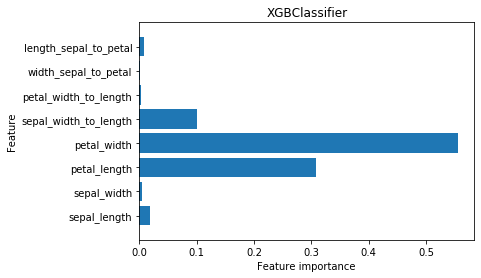

In [338]:
xgbc = XGBClassifier(booster='gbtree', n_jobs=-1)
plot_feature_importances(xgbc)

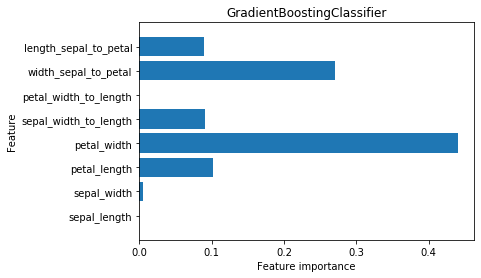

In [339]:
gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, min_samples_split=3)
plot_feature_importances(gbc)

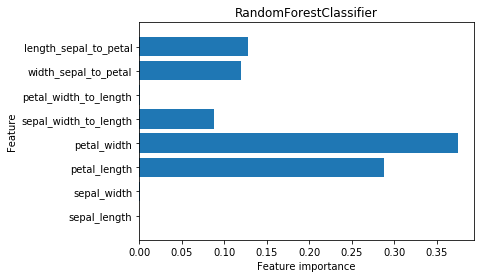

In [340]:
rf = RandomForestClassifier(max_depth=3, max_features=8, n_jobs=-1)
plot_feature_importances(rf)

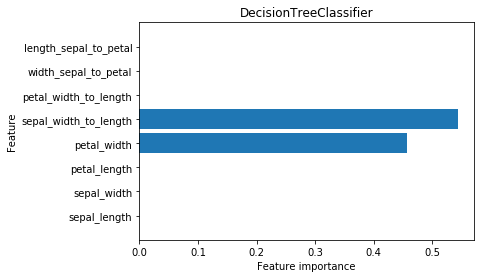

In [341]:
cart = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, min_samples_leaf=2)
plot_feature_importances(cart)